# Feature Engineering on Time Series

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from ucimlrepo import fetch_ucirepo 

## Sales Transactions

In [6]:
# fetch dataset 
sales_transactions_weekly = fetch_ucirepo(id=396) 
  
# Extract the DataFrame from the dictionary
df = sales_transactions_weekly['data']['features']

# Display the first few rows
df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [7]:
# Define the list of columns to keep
selected_columns = [
    'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9',
    'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19',
    'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29',
    'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39',
    'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49',
    'W50', 'W51'
]

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

df_selected.shape

(811, 52)

In [8]:
main_df = df_selected.transpose()

main_df.head()

,0,1,2,3,4,5,6,7,8,9,...,801,802,803,804,805,806,807,808,809,810
W0,11,7,7,12,8,3,4,8,14,22,...,0,5,3,1,4,0,0,1,0,0
W1,12,6,11,8,5,3,8,6,9,19,...,0,1,2,1,2,0,1,0,0,1
W2,10,3,8,13,13,2,3,10,10,19,...,1,3,0,1,2,1,0,0,0,0
W3,8,2,9,5,11,7,7,9,7,29,...,0,5,0,3,6,0,0,0,1,0
W4,13,7,10,9,6,6,8,6,11,20,...,0,4,2,2,0,0,1,1,0,0


In [9]:
sales_df = main_df.iloc[:, [0]]  # Select the first column
sales_df.columns = ['Purchase Quantity']  # Rename it to 'Purchase'

sales_df.head()

,Purchase Quantity
W0,11
W1,12
W2,10
W3,8
W4,13


## Create Lag Based Univariate Features

In [11]:
lag = [1,2,3]

for value in lag:
    sales_df[f'Purchase Quantity {value}'] = sales_df['Purchase Quantity'].shift(value)

sales_df.head()

,Purchase Quantity,Purchase Quantity 1,Purchase Quantity 2,Purchase Quantity 3
W0,11,NaN,NaN,NaN
W1,12,11.0,NaN,NaN
W2,10,12.0,11.0,NaN
W3,8,10.0,12.0,11.0
W4,13,8.0,10.0,12.0


In [12]:
sales_df.fillna(0, inplace = True)

sales_df.head()

,Purchase Quantity,Purchase Quantity 1,Purchase Quantity 2,Purchase Quantity 3
W0,11,0.0,0.0,0.0
W1,12,11.0,0.0,0.0
W2,10,12.0,11.0,0.0
W3,8,10.0,12.0,11.0
W4,13,8.0,10.0,12.0


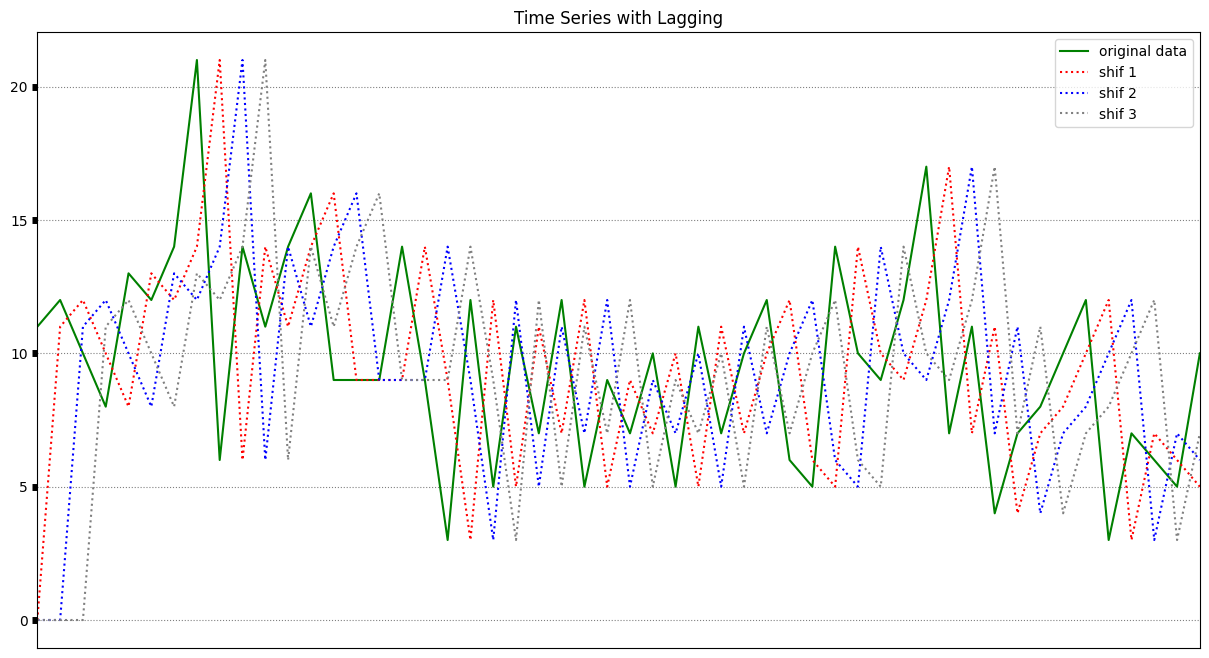

In [13]:
date = sales_df.index

variable = sales_df['Purchase Quantity']
lag1 = sales_df['Purchase Quantity 1']
lag2 = sales_df['Purchase Quantity 2']
lag3 = sales_df['Purchase Quantity 3']

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(date, variable, linestyle='-', color = 'green', label='original data')
ax.plot(date, lag1, linestyle=':', color = 'red', label='shif 1')
ax.plot(date, lag2, linestyle=':', color = 'blue', label='shif 2')
ax.plot(date, lag3, linestyle=':', color = 'grey', label='shif 3')

ax.set_xlim(0, 51)

plt.title('Time Series with Lagging')
plt.legend(bbox_to_anchor=(1, 1))

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='black', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

## Calculating Rolling Statistics

Rolling Statistics are created to understand the behavior of
the time series data over a rolling window. The statistical
parameters such as mean, median, or standard deviation
over a sliding window can be calculated as features.

In [16]:
window = 3

sales_df['rolling_mean'] =  sales_df['Purchase Quantity'].rolling(window=window).mean()

sales_df['rolling_std'] =  sales_df['Purchase Quantity'].rolling(window=window).std()

sales_df.fillna(0, inplace = True)

sales_df.head(10)

,Purchase Quantity,Purchase Quantity 1,Purchase Quantity 2,Purchase Quantity 3,rolling_mean,rolling_std
W0,11,0.0,0.0,0.0,0.000000,0.000000
W1,12,11.0,0.0,0.0,0.000000,0.000000
W2,10,12.0,11.0,0.0,11.000000,1.000000
W3,8,10.0,12.0,11.0,10.000000,2.000000
W4,13,8.0,10.0,12.0,10.333333,2.516611
W5,12,13.0,8.0,10.0,11.000000,2.645751
W6,14,12.0,13.0,8.0,13.000000,1.000000
W7,21,14.0,12.0,13.0,15.666667,4.725816
W8,6,21.0,14.0,12.0,13.666667,7.505553
W9,14,6.0,21.0,14.0,13.666667,7.505553


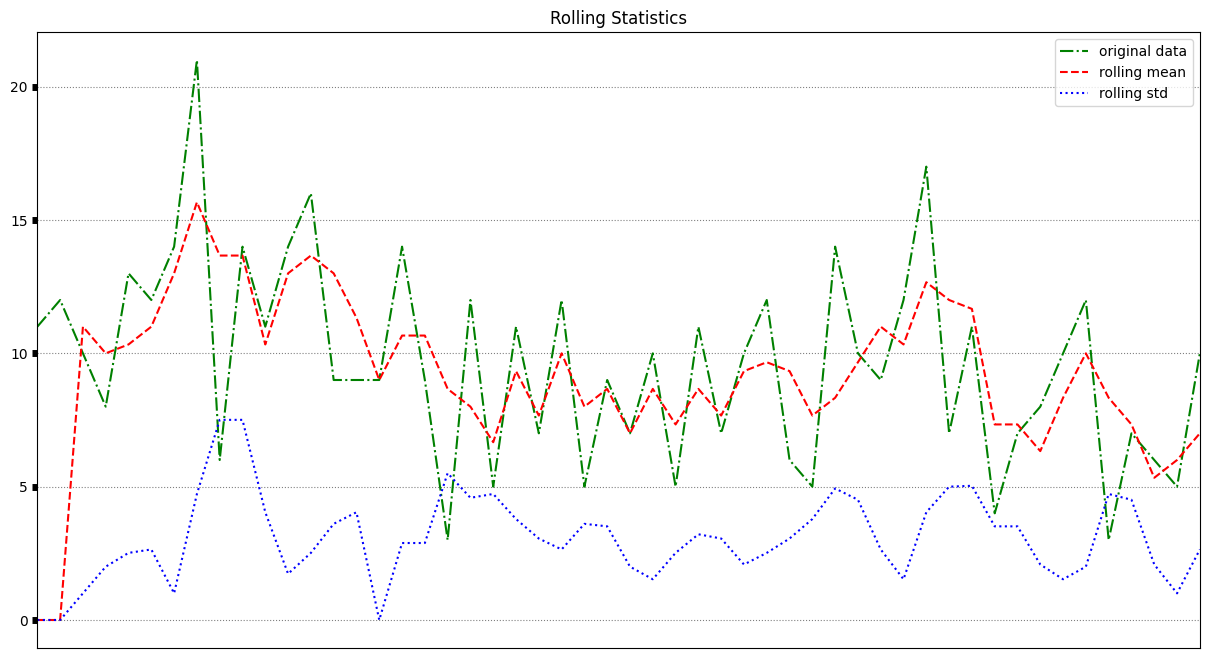

In [17]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
mean = sales_df['rolling_mean']
std = sales_df['rolling_std']

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(date, variable, linestyle='-.', color = 'green', label='original data')
ax.plot(date, mean, linestyle='--', color = 'red', label='rolling mean')
ax.plot(date, std, linestyle=':', color = 'blue', label='rolling std')

plt.title('Rolling Statistics')
ax.set_xlim(0, 51)
plt.legend(bbox_to_anchor=(1, 1))

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='black', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

## Computing Expanding Window Statistics

Expanding window statistical features are an extension of
rolling window statistical features. In rolling window features,
we created rolling average and rolling standard deviation for
a single fixed window of time period, whereas in expanding
window, we will be creating features over an increasing
number of historical time periods. These features would help
in capturing patterns or trends over changing time periods in
a time series data.

In [20]:
# Defines the minimum window size
window_min = 3   

# Defines the maximum window size
window_max = 10  

for window in range(window_min, window_max + 1):    # Iterates over window sizes from 3 to 10
    sales_df[f'Expanding_Mean_{window}'] = sales_df['Purchase Quantity'].expanding(window).mean()  # Computes the expanding mean
    sales_df[f'Expanding_Std_{window}'] = sales_df['Purchase Quantity'].expanding(window).std()    # Computes the expanding standard deviation

# Replaces NaN values (from small windows) with 0
sales_df.fillna(0, inplace=True)

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, W0 to W51
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Purchase Quantity    52 non-null     int64  
 1   Purchase Quantity 1  52 non-null     float64
 2   Purchase Quantity 2  52 non-null     float64
 3   Purchase Quantity 3  52 non-null     float64
 4   rolling_mean         52 non-null     float64
 5   rolling_std          52 non-null     float64
 6   Expanding_Mean_3     52 non-null     float64
 7   Expanding_Std_3      52 non-null     float64
 8   Expanding_Mean_4     52 non-null     float64
 9   Expanding_Std_4      52 non-null     float64
 10  Expanding_Mean_5     52 non-null     float64
 11  Expanding_Std_5      52 non-null     float64
 12  Expanding_Mean_6     52 non-null     float64
 13  Expanding_Std_6      52 non-null     float64
 14  Expanding_Mean_7     52 non-null     float64
 15  Expanding_Std_7      52 non-null     float64


In [21]:
sales_df.head()

,Purchase Quantity,Purchase Quantity 1,Purchase Quantity 2,Purchase Quantity 3,rolling_mean,rolling_std,Expanding_Mean_3,Expanding_Std_3,Expanding_Mean_4,Expanding_Std_4,...,Expanding_Mean_6,Expanding_Std_6,Expanding_Mean_7,Expanding_Std_7,Expanding_Mean_8,Expanding_Std_8,Expanding_Mean_9,Expanding_Std_9,Expanding_Mean_10,Expanding_Std_10
W0,11,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W1,12,11.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W2,10,12.0,11.0,0.0,11.000000,1.000000,11.00,1.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W3,8,10.0,12.0,11.0,10.000000,2.000000,10.25,1.707825,10.25,1.707825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W4,13,8.0,10.0,12.0,10.333333,2.516611,10.80,1.923538,10.80,1.923538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### How is this different from a rolling mean?

    Expanding Mean (Cumulative Mean): Uses all previous data points from the start to compute the mean.
    
    Rolling Mean: Uses only the last N points in a fixed-sized window.

    Purchase Quantity	Expanding_Mean_3
    -----------------       ----------------
    11	                NaN (less than 3)
    12	                NaN (less than 3)
    10	                (11+12+10)/3 = 11
    8	                (11+12+10+8)/4 = 10.25
    13	                (11+12+10+8+13)/5 = 10.80

In [23]:
(11+12+10+8+13)/5

10.8

In [24]:
sales_df.head()

,Purchase Quantity,Purchase Quantity 1,Purchase Quantity 2,Purchase Quantity 3,rolling_mean,rolling_std,Expanding_Mean_3,Expanding_Std_3,Expanding_Mean_4,Expanding_Std_4,...,Expanding_Mean_6,Expanding_Std_6,Expanding_Mean_7,Expanding_Std_7,Expanding_Mean_8,Expanding_Std_8,Expanding_Mean_9,Expanding_Std_9,Expanding_Mean_10,Expanding_Std_10
W0,11,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W1,12,11.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W2,10,12.0,11.0,0.0,11.000000,1.000000,11.00,1.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W3,8,10.0,12.0,11.0,10.000000,2.000000,10.25,1.707825,10.25,1.707825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W4,13,8.0,10.0,12.0,10.333333,2.516611,10.80,1.923538,10.80,1.923538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
sales_df[['Expanding_Mean_3', 'Expanding_Std_3', 'Expanding_Mean_4',
       'Expanding_Std_4', 'Expanding_Mean_5', 'Expanding_Std_5',
       'Expanding_Mean_6', 'Expanding_Std_6', 'Expanding_Mean_7',
       'Expanding_Std_7', 'Expanding_Mean_8', 'Expanding_Std_8',
       'Expanding_Mean_9', 'Expanding_Std_9', 'Expanding_Mean_10',
       'Expanding_Std_10']].head(5).transpose()

,W0,W1,W2,W3,W4
Expanding_Mean_3,0.0,0.0,11.0,10.250000,10.800000
Expanding_Std_3,0.0,0.0,1.0,1.707825,1.923538
Expanding_Mean_4,0.0,0.0,0.0,10.250000,10.800000
Expanding_Std_4,0.0,0.0,0.0,1.707825,1.923538
Expanding_Mean_5,0.0,0.0,0.0,0.000000,10.800000
Expanding_Std_5,0.0,0.0,0.0,0.000000,1.923538
Expanding_Mean_6,0.0,0.0,0.0,0.000000,0.000000
Expanding_Std_6,0.0,0.0,0.0,0.000000,0.000000
Expanding_Mean_7,0.0,0.0,0.0,0.000000,0.000000
Expanding_Std_7,0.0,0.0,0.0,0.000000,0.000000


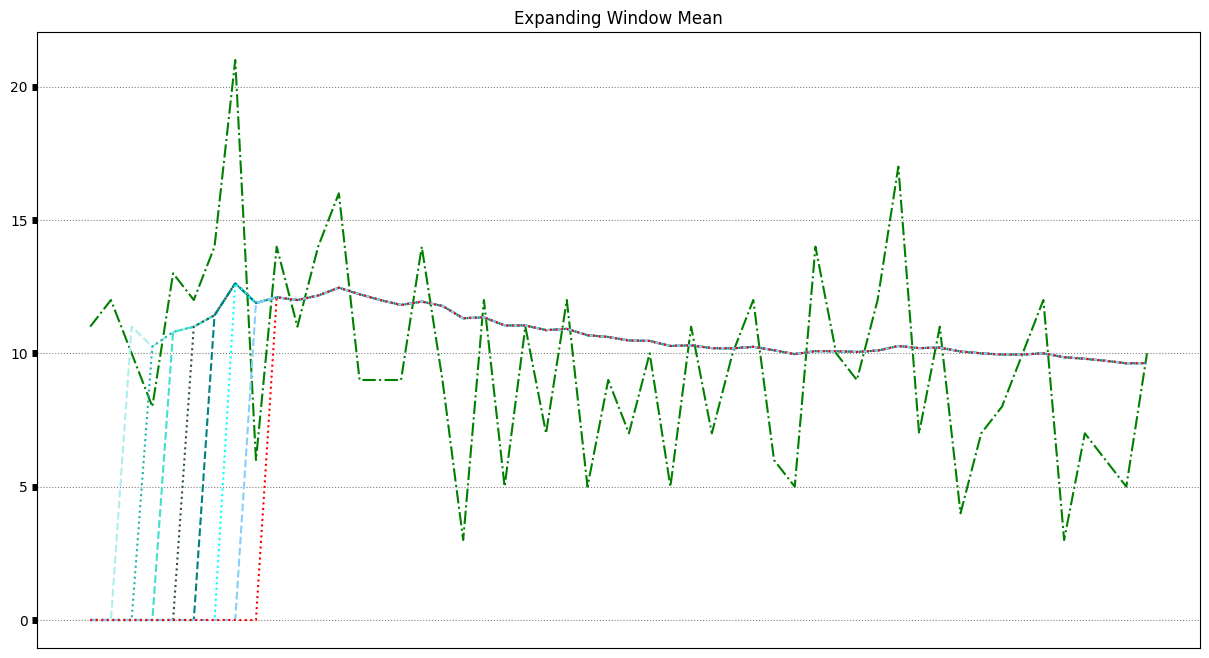

In [26]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
exp1 = sales_df['Expanding_Mean_3']
exp2 = sales_df['Expanding_Mean_4']
exp3 = sales_df['Expanding_Mean_5']
exp4 = sales_df['Expanding_Mean_6']
exp5 = sales_df['Expanding_Mean_7']
exp6 = sales_df['Expanding_Mean_8']
exp7 = sales_df['Expanding_Mean_9']
exp8 = sales_df['Expanding_Mean_10']

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(date, variable, linestyle='-.', color = 'green')
ax.plot(date, exp1, linestyle='--', color = 'paleturquoise')
ax.plot(date, exp2, linestyle=':', color = 'lightseagreen')
ax.plot(date, exp3, linestyle='--', color = 'turquoise')
ax.plot(date, exp4, linestyle=':', color = 'darkslategrey')
ax.plot(date, exp5, linestyle='--', color = 'teal')
ax.plot(date, exp6, linestyle=':', color = 'aqua')
ax.plot(date, exp7, linestyle='--', color = 'lightskyblue')
ax.plot(date, exp8, linestyle=':', color = 'red')

plt.title('Expanding Window Mean')

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='black', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

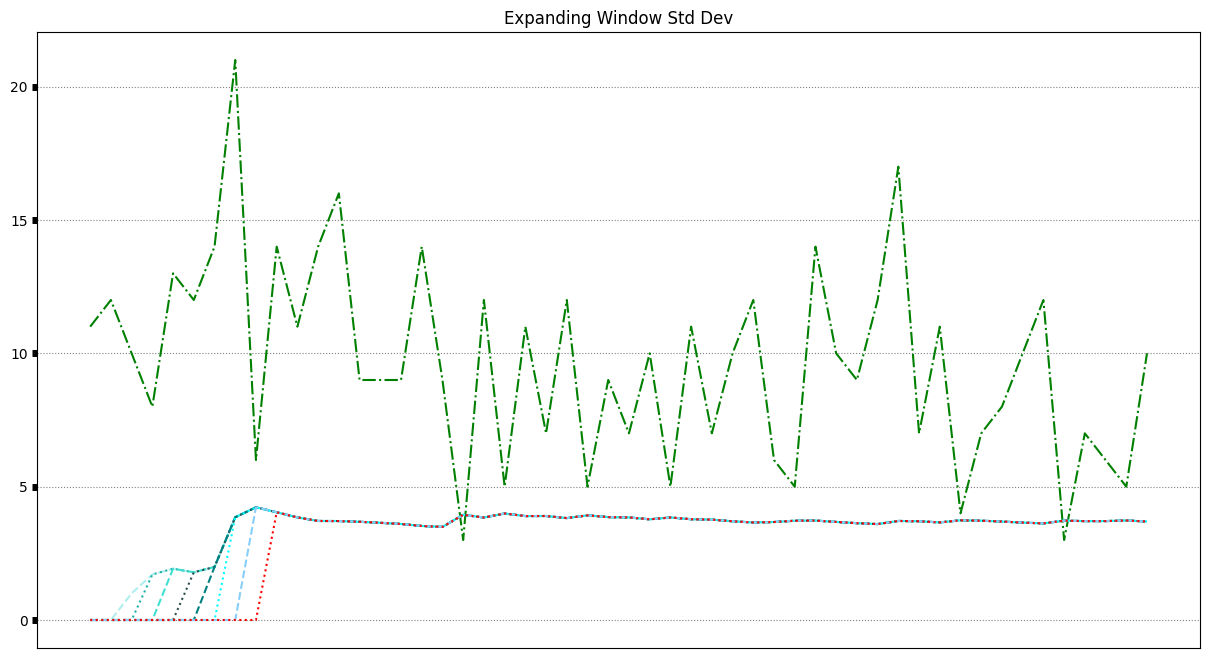

In [27]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
exp1 = sales_df['Expanding_Std_3']
exp2 = sales_df['Expanding_Std_4']
exp3 = sales_df['Expanding_Std_5']
exp4 = sales_df['Expanding_Std_6']
exp5 = sales_df['Expanding_Std_7']
exp6 = sales_df['Expanding_Std_8']
exp7 = sales_df['Expanding_Std_9']
exp8 = sales_df['Expanding_Std_10']

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(date, variable, linestyle='-.', color = 'green')
ax.plot(date, exp1, linestyle='--', color = 'paleturquoise')
ax.plot(date, exp2, linestyle=':', color = 'lightseagreen')
ax.plot(date, exp3, linestyle='--', color = 'turquoise')
ax.plot(date, exp4, linestyle=':', color = 'darkslategrey')
ax.plot(date, exp5, linestyle='--', color = 'teal')
ax.plot(date, exp6, linestyle=':', color = 'aqua')
ax.plot(date, exp7, linestyle='--', color = 'lightskyblue')
ax.plot(date, exp8, linestyle=':', color = 'red')

plt.title('Expanding Window Std Dev')

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='black', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

## Calculating Exponential Moving Averages

Exponential moving averages are another method of
creating time series features by calculating weighted
averages over a period of time. In this method, more
weightage is given to the recent observations compared to
the older ones, thus giving an advantage to the recent
observations, which are more relevant to understand the
data. 

This method helps in smoothing the data from noise
and any other fluctuations in the data over time. It also helps
in identifying short-term trends in the data.

### How Exponential Moving Average (EMA) Works

EMA is a weighted moving average where:

- Recent values get more weight.
- Older values have exponentially decreasing influence.

The formula used:

$$
EMA_t = \alpha \times X_t + (1 - \alpha) \times EMA_{t-1}
$$

Where:

- $\alpha $ = Smoothing factor (between 0 and 1).
- $ X_t $ = Current value of the input variable.
- $ EMA_{t-1} $ = Previous EMA value.

    EMA(t) = alpha * Current Observation + (1-alpha) * Previous EMA

In [32]:
def calc_exp_mov_avgs(alpha, dataset, inputvariable):
    """
    Calculates the Exponential Moving Average (EMA) for a given dataset.

    Parameters:
    alpha (float): The smoothing factor (0 < alpha ≤ 1), controls how much weight is given to recent values.
    dataset (DataFrame): The dataset containing the input variable.
    inputvariable (str): The column name for which the EMA is calculated.

    Returns:
    DataFrame: A DataFrame containing the original input variable and its corresponding EMA values (first 10 rows).
    """
    
    ema_list = [dataset[inputvariable].iloc[0]]                                    # Initialize EMA with the first value of the input variable
    
    for i in range(1, len(dataset)):                                               # Iterate over the dataset starting from the second row
        ema = alpha * dataset[inputvariable].iloc[i] + (1 - alpha) * ema_list[-1]  # Compute EMA using the formula
        ema_list.append(ema)                                                       # Append the new EMA value to the list
    
    dataset['EMA'] = ema_list                                                      # Assign the computed EMA values as a new column in the dataset
    
    return dataset[[inputvariable, 'EMA']].head(10)                                # Return the first 10 rows of the dataset with EMA values

In [33]:
# Call the function to compute the Exponential Moving Average with alpha = 0.3 on 'Purchase Quantity'
calc_exp_mov_avgs(0.3, sales_df, 'Purchase Quantity')

,Purchase Quantity,EMA
W0,11,11.000000
W1,12,11.300000
W2,10,10.910000
W3,8,10.037000
W4,13,10.925900
W5,12,11.248130
W6,14,12.073691
W7,21,14.751584
W8,6,12.126109
W9,14,12.688276


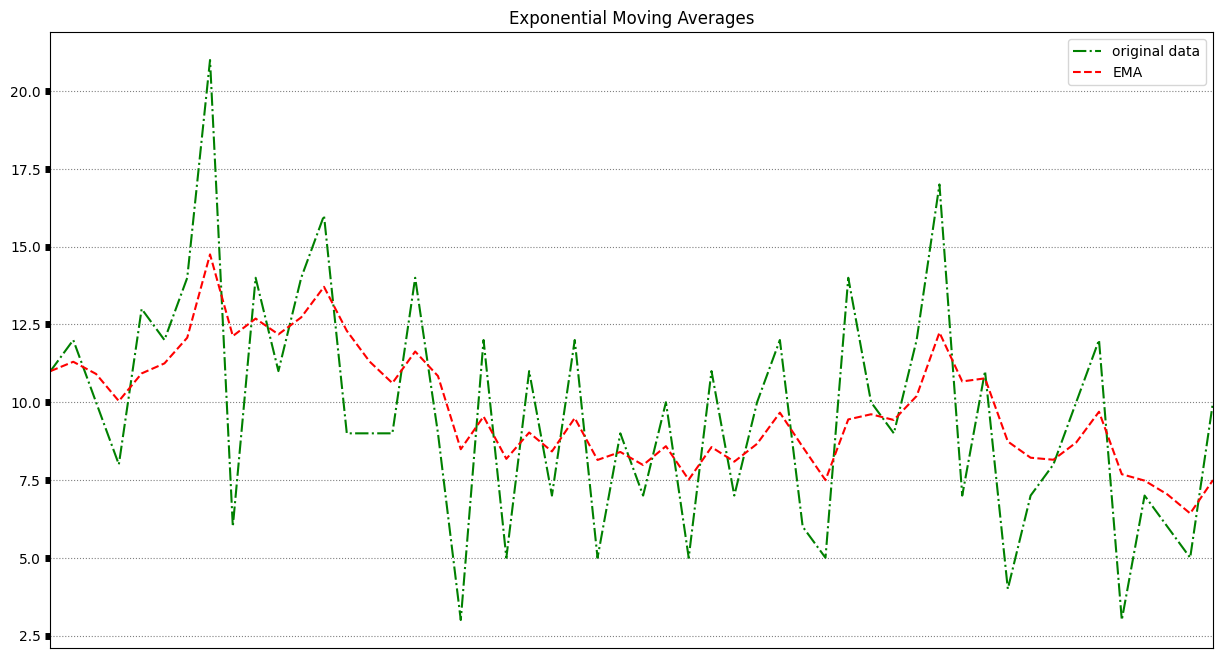

In [34]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
ema = sales_df['EMA']

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(date, variable, linestyle='-.', color = 'green', label='original data')
ax.plot(date, ema, linestyle='--', color = 'red', label='EMA')

plt.title('Exponential Moving Averages')
ax.set_xlim(0, 51)
plt.legend(bbox_to_anchor=(1, 1))

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='black', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

## Multivariate Feature Engineering

Multivariate time series data consists of multiple variable
time series data, which can be provided as input for
forecasting future values. Multivariate feature engineering
involves deriving features from more than one variable to
identify patterns, trends, or seasonality in the data. 

In [37]:
garment_df = pd.read_csv('garments_worker_productivity.csv')

garment_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [38]:
garment_df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
date,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,sweing,finishing,sweing,sweing,sweing,sweing,finishing,sweing,sweing,sweing
day,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday
team,8,1,11,12,6,7,2,3,2,1
targeted_productivity,0.8,0.75,0.8,0.8,0.8,0.8,0.75,0.75,0.75,0.75
smv,26.16,3.94,11.41,11.41,25.9,25.9,3.94,28.08,19.87,28.08
wip,1108.0,NaN,968.0,968.0,1170.0,984.0,NaN,795.0,733.0,681.0
over_time,7080,960,3660,3660,1920,6720,960,6900,6000,6900
incentive,98,0,50,50,50,38,0,45,34,45


In [39]:
garment_df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [40]:
garment_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [41]:
garment_df['date'] = pd.to_datetime(garment_df['date'])
garment_df['date']

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [42]:
garment_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [43]:
garment_df = garment_df.sort_values(by='date')

garment_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
18,2015-01-01,Quarter1,finishing,Thursday,11,0.70,4.15,NaN,1440,0,0.0,0,0,12.0,0.436326
17,2015-01-01,Quarter1,sweing,Thursday,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.521180
16,2015-01-01,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
15,2015-01-01,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056


In [44]:
garment_df['team'].unique()

array([ 8, 11,  4,  7, 10,  5,  9,  2,  3,  6, 12,  1], dtype=int64)

In [45]:
garment_df_team1 = garment_df[garment_df['team']==1]
garment_df_team1

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
24,2015-01-03,Quarter1,sweing,Saturday,1,0.80,28.08,772.0,6300,50,0.0,0,0,56.5,0.800725
23,2015-01-03,Quarter1,finishing,Saturday,1,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.902917
42,2015-01-04,Quarter1,finishing,Sunday,1,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.915229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,2015-03-09,Quarter2,sweing,Monday,1,0.75,26.82,1322.0,7140,65,0.0,0,0,59.0,0.850427
1155,2015-03-10,Quarter2,finishing,Tuesday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.880754
1152,2015-03-10,Quarter2,sweing,Tuesday,1,0.75,26.82,1574.0,7080,75,0.0,0,0,59.0,0.900061
1186,2015-03-11,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051


In [46]:
# Reset index
garment_df_team1.reset_index(inplace = True, drop = True)

garment_df_team1.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
1,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
2,2015-01-03,Quarter1,sweing,Saturday,1,0.80,28.08,772.0,6300,50,0.0,0,0,56.5,0.800725
3,2015-01-03,Quarter1,finishing,Saturday,1,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.902917
4,2015-01-04,Quarter1,finishing,Sunday,1,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.915229


In [47]:
garment_df_team1.head().transpose()

,0,1,2,3,4
date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-03 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,finishing,sweing,sweing,finishing,finishing
day,Thursday,Thursday,Saturday,Saturday,Sunday
team,1,1,1,1,1
targeted_productivity,0.75,0.75,0.8,0.8,0.8
smv,3.94,28.08,28.08,3.94,3.94
wip,NaN,681.0,772.0,NaN,NaN
over_time,960,6900,6300,960,960
incentive,0,45,50,0,0


In [48]:
# Computes summary statistics along with custom percentiles (25%, 50%, 75%, 98%)
garment_df_team1[['smv', 'wip', 'incentive']].describe(percentiles = [0.25, 0.5, 0.75, 0.98])

,smv,wip,incentive
count,105.000000,56.000000,105.000000
mean,15.370857,1609.196429,46.600000
std,11.336076,2105.399150,98.837824
min,3.940000,171.000000,0.000000
25%,3.940000,1185.000000,0.000000
50%,22.520000,1418.000000,30.000000
75%,26.160000,1537.000000,75.000000
98%,28.080000,1870.700000,113.000000
max,49.100000,16882.000000,960.000000


It appears that the difference between the
98th percentile and the maximum is comparatively large for
the `wip` and `incentive` columns, denoting the presence of
outliers in the data.

In [50]:
def treat_outlier(dataset, variable, x):                         # Function to cap outliers at the 98th percentile
    cap = dataset[variable].describe(percentiles=[0.98])['98%']  # Calculate the 98th percentile cap
    if x > cap:                                                  # If the value exceeds the cap, replace it with the cap
        return cap
    else:                                                        # Otherwise, return the original value
        return x

In [51]:
# Apply function 'treat_outlier' on 'wip' and 'incentive'

garment_df_team1['wip'] = garment_df_team1['wip'].apply(lambda x: treat_outlier(garment_df_team1, 'wip', x))

garment_df_team1['incentive'] = garment_df_team1['incentive'].apply(lambda x: treat_outlier(garment_df_team1, 'incentive', x))

In [52]:
# Computes summary statistics along with custom percentiles (25%, 50%, 75%, 98%)
garment_df_team1[['smv', 'wip', 'incentive']].describe(percentiles = [0.25, 0.5, 0.75, 0.98])

,smv,wip,incentive
count,105.000000,56.000000,105.000000
mean,15.370857,1341.132143,38.295238
std,11.336076,346.001345,41.007721
min,3.940000,171.000000,0.000000
25%,3.940000,1185.000000,0.000000
50%,22.520000,1418.000000,30.000000
75%,26.160000,1537.000000,75.000000
98%,28.080000,1870.430000,113.000000
max,49.100000,1870.700000,113.000000


## Creating Lag Based Multivariate Features

In multivariate analysis, lag-based features are created from
multiple independent variables present in the time series
data. The historical observations of all or a subset of
variables are used to calculate the time lag of the variables
and to create new features out of them. For example, the lag
feature for an observation at time T can be created using the
value at time T-1 or T-2, and so on. These features can be
used to identify correlations and patterns in the data and
increase the forecasting accuracy of the data.

In [55]:
lag_order = 2       # Defines the number of lagged values to create

for variable in ['smv', 'wip', 'incentive']:                                # Loop through selected variables
    for lag in range(1, lag_order + 1):                                     # Iterate over lag values (1 to 2)
        col_name = f'{variable}_Lag{lag}'                                   # Create column name for lagged variable
        garment_df_team1[col_name] = garment_df_team1[variable].shift(lag)  # Shift values by lag and assign to new column
        
garment_df_team1 = garment_df_team1.fillna(0)                               # Replace NaN values with 0

# Display the selected columns, including the original and lagged values
garment_df_team1[['smv', 'smv_Lag1', 'smv_Lag2', 'wip', 'wip_Lag1', 'wip_Lag2', 'incentive', 'incentive_Lag1', 'incentive_Lag2']]

,smv,smv_Lag1,smv_Lag2,wip,wip_Lag1,wip_Lag2,incentive,incentive_Lag1,incentive_Lag2
0,3.94,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,28.08,3.94,0.00,681.0,0.0,0.0,45.0,0.0,0.0
2,28.08,28.08,3.94,772.0,681.0,0.0,50.0,45.0,0.0
3,3.94,28.08,28.08,0.0,772.0,681.0,0.0,50.0,45.0
4,3.94,3.94,28.08,0.0,0.0,772.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...
100,26.82,3.94,3.94,1322.0,0.0,0.0,65.0,113.0,0.0
101,3.94,26.82,3.94,0.0,1322.0,0.0,0.0,65.0,113.0
102,26.82,3.94,26.82,1574.0,0.0,1322.0,75.0,0.0,65.0
103,26.82,26.82,3.94,1322.0,1574.0,0.0,45.0,75.0,0.0


## Creating Interaction Terms-Based Features

In [57]:
garment_df_team1.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'smv_Lag1', 'smv_Lag2', 'wip_Lag1', 'wip_Lag2', 'incentive_Lag1',
       'incentive_Lag2'],
      dtype='object')

In [58]:
garment_df_team1['targeted_individual_productivity'] = garment_df_team1['targeted_productivity'] / garment_df_team1['no_of_workers']

garment_df_team1['actual_individual_productivity'] = garment_df_team1['actual_productivity']/garment_df_team1['no_of_workers']

garment_df_team1['individual_productivity_gap'] = garment_df_team1['targeted_individual_productivity'] - garment_df_team1['actual_individual_productivity'] 

garment_df_team1[['date', 'targeted_productivity', 'actual_productivity', 'targeted_individual_productivity', 
                  'actual_individual_productivity', 'individual_productivity_gap']].head(10)

,date,targeted_productivity,actual_productivity,targeted_individual_productivity,actual_individual_productivity,individual_productivity_gap
0,2015-01-01,0.75,0.886500,0.093750,0.110812,-0.017062
1,2015-01-01,0.75,0.750428,0.013043,0.013051,-0.000007
2,2015-01-03,0.80,0.800725,0.014159,0.014172,-0.000013
3,2015-01-03,0.80,0.902917,0.100000,0.112865,-0.012865
4,2015-01-04,0.80,0.915229,0.100000,0.114404,-0.014404
5,2015-01-04,0.80,0.800319,0.013559,0.013565,-0.000005
6,2015-01-05,0.80,0.800319,0.013559,0.013565,-0.000005
7,2015-01-05,0.80,0.961059,0.100000,0.120132,-0.020132
8,2015-01-06,0.80,0.850502,0.013559,0.014415,-0.000856
9,2015-01-06,0.80,0.936496,0.100000,0.117062,-0.017062


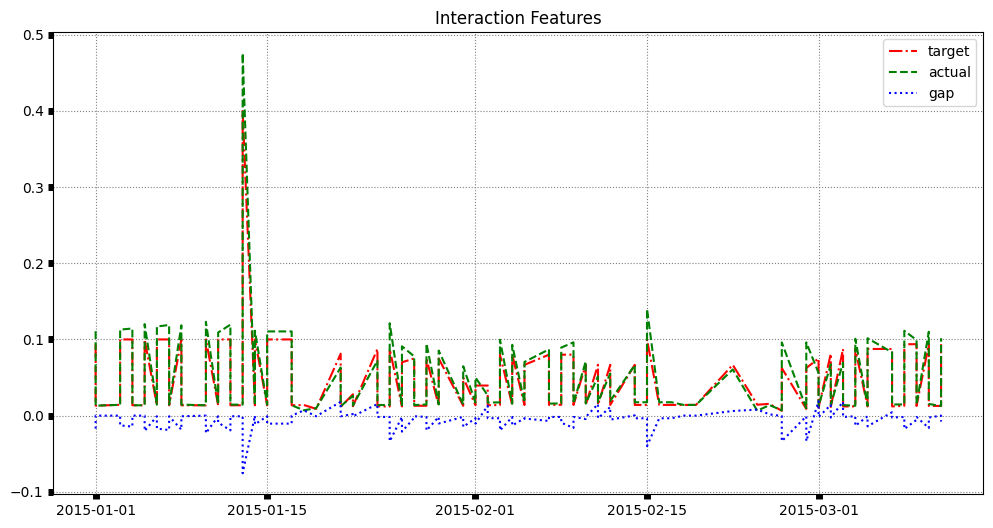

In [59]:
date = garment_df_team1['date']
tgt = garment_df_team1['targeted_individual_productivity']
act = garment_df_team1['actual_individual_productivity']
gap = garment_df_team1['individual_productivity_gap']


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date, tgt, linestyle='-.', color = 'red', label='target')
ax.plot(date, act, linestyle='--', color = 'green', label='actual')
ax.plot(date, gap, linestyle=':', color = 'blue', label='gap')

plt.title('Interaction Features')
#ax.set_xlim(0, 51)
plt.legend(bbox_to_anchor=(1, 1))

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='black', labelsize='medium', width=5)

plt.show()

## Creating Aggregated Features

Aggregated features are created by aggregating or
summarizing the variables from multiple time steps to form
combined features that are simplified. When the data size is
large and the information is too granular, aggregating the
features will provide more of a consolidated view of the data.

In [61]:
garment_df_team1['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

The data has six working days excluding Fridays. This means
that we can have a rolling window size of 6 to create new
features.

In [63]:
garment_df_team1_agg = garment_df_team1[['date','targeted_productivity','smv', 'wip', 'over_time', 'incentive', 
                                         'idle_time', 'idle_men','no_of_style_change', 'no_of_workers', 'actual_productivity']]

In the next step, let us set the window size as 6 and create a
list of columns for which aggregate features need to be
created. Then, we will create the aggregate features as rolling mean of
the existing variables for a window size of 6.

In [65]:
window = 6

columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 
           'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

for col in columns:
    garment_df_team1_agg[f'Aggregate_{col}'] = garment_df_team1_agg[col].rolling(window).mean()

In the next step, we will drop the columns from the original
data and keep only the aggregated features. We will also
remove the null value records from aggregated features.

In [67]:
garment_df_team1_agg.drop(columns=columns, inplace=True)  # Drops specified columns from the DataFrame

garment_df_team1_agg.dropna(inplace=True)                 # Removes rows with missing values

garment_df_team1_agg.head(5).transpose()                  # Displays the first 5 rows, transposed for better readability

,5,6,7,8,9
date,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-06 00:00:00
Aggregate_targeted_productivity,0.783333,0.791667,0.8,0.8,0.8
Aggregate_smv,15.69,19.393333,15.37,15.05,15.05
Aggregate_wip,414.333333,604.0,490.5,559.666667,559.666667
Aggregate_over_time,3860.0,4880.0,4050.0,4770.0,4850.0
Aggregate_incentive,26.333333,36.833333,29.333333,33.5,33.5
Aggregate_idle_time,0.0,0.0,0.0,0.0,0.0
Aggregate_idle_men,0.0,0.0,0.0,0.0,0.0
Aggregate_no_of_style_change,0.0,0.0,0.0,0.0,0.0
Aggregate_no_of_workers,32.833333,41.333333,33.083333,33.5,33.5
